In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols,simplify
from sympy.solvers import solve
from sympy.plotting import plot
from sympy import lambdify
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

In [10]:
# class-conditional density

## w1
M1=[-1,1]
cov1=[[1,0],[0,1]]

## w2
M2=[1,0]
cov2=[[2,2],[2,3]]

## Generate 100 random training samples from each of the two densities

a1,b1=np.random.multivariate_normal(M1,cov1,100).T
a2,b2=np.random.multivariate_normal(M2,cov2,100).T

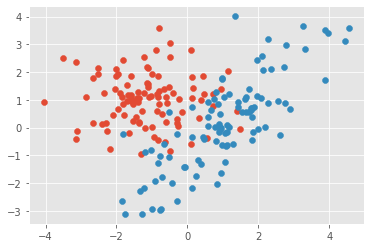

In [11]:
## (a) plot these samples
plt.style.use('ggplot')
plt.scatter(a1,b1)
plt.scatter(a2,b2)
plt.show()

In [12]:
## (b) Find the MLE

M1_est=[np.mean(a1),np.mean(b1)]
M2_est=[np.mean(a2),np.mean(b2)]

cov1_est=np.cov(a1,b1)
cov2_est=np.cov(a2,b2)

print('M1_estimate: \n',M1_est)
print('M2_estimate: \n',M2_est)
print('\n')
print('cov1_estimate: \n',cov1_est)
print('cov2_estimate: \n',cov2_est)

M1_estimate: 
 [-1.1272347637303202, 1.0196935131399545]
M2_estimate: 
 [1.0176072137767807, 0.15860527676387393]


cov1_estimate: 
 [[ 1.14050164 -0.02655455]
 [-0.02655455  0.84406118]]
cov2_estimate: 
 [[1.92566157 1.83208381]
 [1.83208381 2.73209582]]


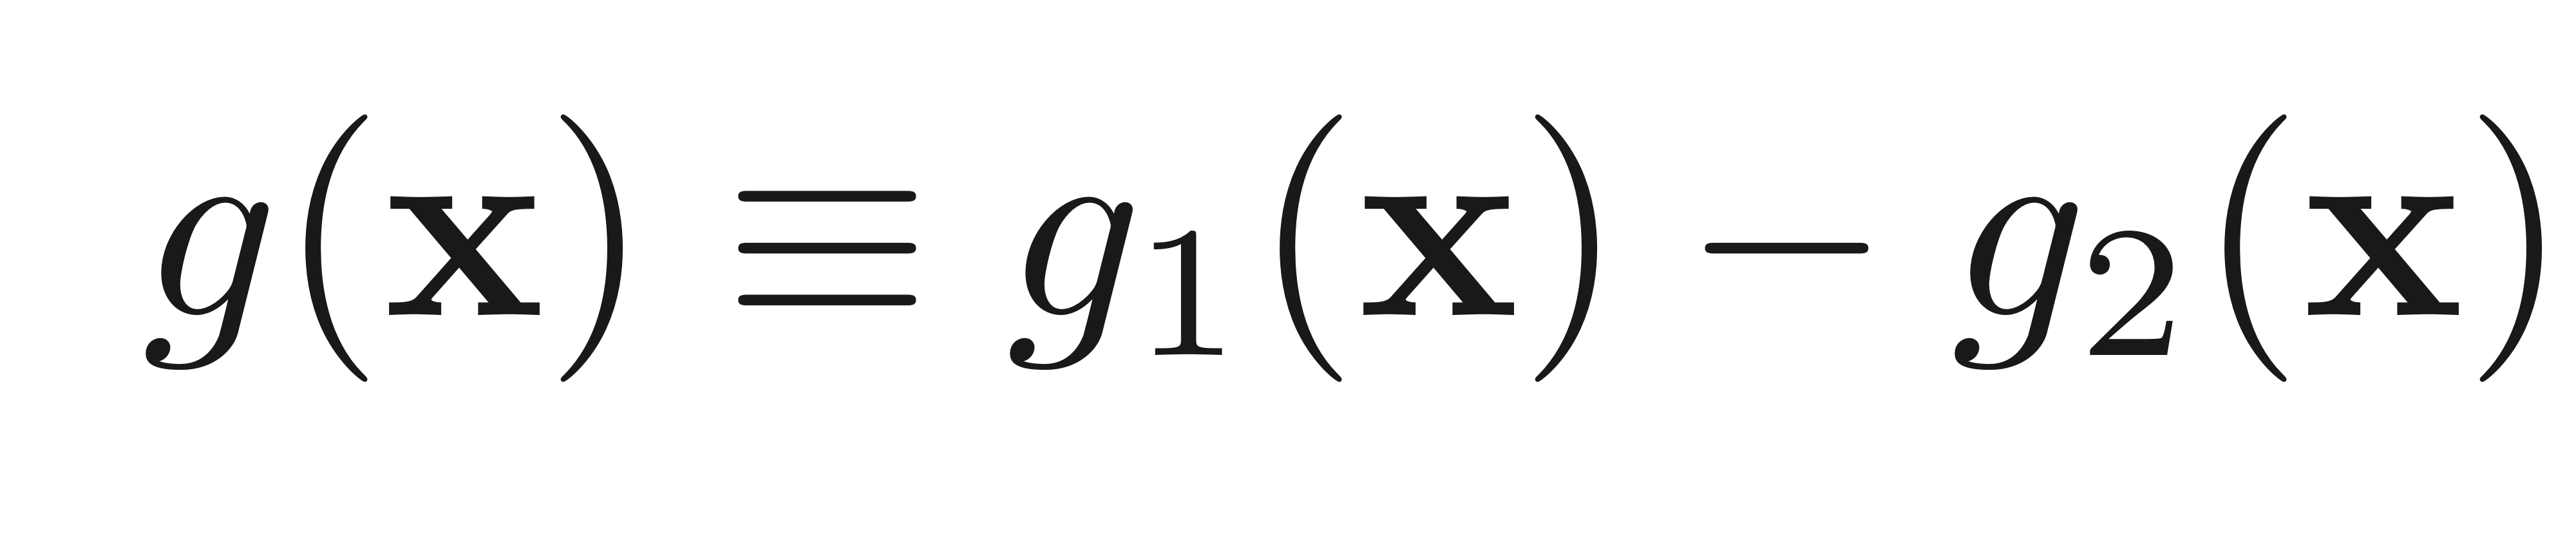

In [13]:
# Decision boundary formulation
Image("decision boundary.png")

In [14]:
# Define decision boundary func

def Decision_boundary(m1,sig1,m2,sig2):
    m1=np.array(m1)
    sig1=np.array(sig1)
    m2=np.array(m2)
    sig2=np.array(sig2)
    return lambda a1,a2:(-1/2)*np.matmul(np.matmul((np.array([a1,a2])-m1).T,np.linalg.inv(sig1)),(np.array([a1,a2])-m1))+1/2*np.matmul(np.matmul((np.array([a1,a2])-m2).T,np.linalg.inv(sig2)),(np.array([a1,a2])-m2))

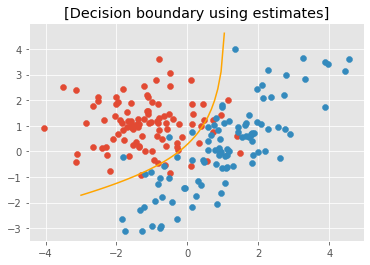

In [15]:
## (c) Decision boundary using estimates

x1,y1=symbols('x1 y1',real=True)
get_var=Decision_boundary(M1_est,cov1_est,M2_est,cov2_est)

F=get_var(x1,y1)
F=simplify(F)

result=lambdify(x1,solve(F,y1)[0])

x_vals=np.linspace(-3,1.5)
y_vals=result(x_vals)

plt.title('[Decision boundary using estimates]')
plt.scatter(a1,b1)
plt.scatter(a2,b2)
plt.plot(x_vals,y_vals,color='orange')
plt.show()

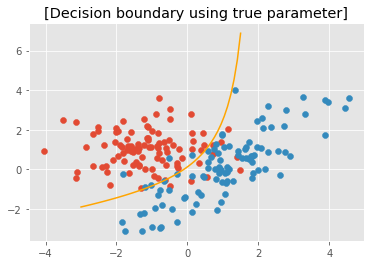

In [16]:
## (d) Decision boundary using true parameter

x1,y1=symbols('x1 y1',real=True)
get_var=Decision_boundary(M1,cov1,M2,cov2)

F=simplify(get_var(x1,y1))

result=lambdify(x1,solve(F,y1)[0])

x_vals=np.linspace(-3,1.5)
y_vals=result(x_vals)

plt.title('[Decision boundary using true parameter]')
plt.scatter(a1,b1)
plt.scatter(a2,b2)
plt.plot(x_vals,y_vals,color='orange')
plt.show()

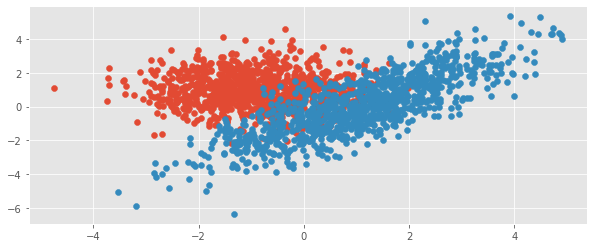

1."Plug-in" error rate : 0.09150 
2. True boundary error rate : 0.09050 


In [31]:
## (e) Draw an independent 1000 test samples

test_a1,test_b1=np.random.multivariate_normal(M1,cov1,1000).T
test_a2,test_b2=np.random.multivariate_normal(M2,cov2,1000).T


plt.rcParams["figure.figsize"] = (10,4)
plt.scatter(test_a1,test_b1)
plt.scatter(test_a2,test_b2)
plt.show()

### Input test samples class

test_classify=[]
for i,j in zip(test_a1,test_b1):
    test_classify.append([i,j,0])

for i,j in zip(test_a2,test_b2):
    test_classify.append([i,j,1])
    
test_classify=np.array(test_classify)

## Error rate for 'plug-in' boundary

plug_result=Decision_boundary(M1_est,cov1_est,M2_est,cov2_est)

plug_predict=[]

for i in test_classify:
    if plug_result(i[0],i[1])>0:
        plug_predict.append([i[0],i[1],0])
    else:
        plug_predict.append([i[0],i[1],1])

plug_predict=np.array(plug_predict)

error_rate1=1-(np.sum(plug_predict[:,2]==test_classify[:,2])/plug_predict.shape[0])

print('1.\"Plug-in\" error rate : %.5f '%error_rate1)

## Error rate for true decision boundary

true_result=Decision_boundary(M1,cov1,M2,cov2)

true_predict=[]

for i in test_classify:
    if true_result(i[0],i[1])>0:
        true_predict.append([i[0],i[1],0])
    else:
        true_predict.append([i[0],i[1],1])

true_predict=np.array(true_predict)

error_rate2=1-(np.sum(true_predict[:,2]==test_classify[:,2])/true_predict.shape[0])

print('2. True boundary error rate : %.5f '%error_rate2)




In [32]:
# (f) Repeat parts (a)-(e)

a1,b1=np.random.multivariate_normal(M1,cov1,100).T
a2,b2=np.random.multivariate_normal(M2,cov2,100).T

# keep the same test set
a1=np.array(list(a1)+list(test_a1)) 
b1=np.array(list(b1)+list(test_b1)) 
a2=np.array(list(a2)+list(test_a2))
b2=np.array(list(b2)+list(test_b2)) 

M1_est=[np.mean(a1),np.mean(b1)]
M2_est=[np.mean(a2),np.mean(b2)]

cov1_est=np.cov(a1,b1)
cov2_est=np.cov(a2,b2)


### Input test samples class

test_classify=[]
for i,j in zip(a1,b1):
    test_classify.append([i,j,0])

for i,j in zip(a2,b2):
    test_classify.append([i,j,1])
    
test_classify=np.array(test_classify)

## Error rate for 'plug-in' boundary

plug_result=Decision_boundary(M1_est,cov1_est,M2_est,cov2_est)

plug_predict=[]

for i in test_classify:
    if plug_result(i[0],i[1])>0:
        plug_predict.append([i[0],i[1],0])
    else:
        plug_predict.append([i[0],i[1],1])

plug_predict=np.array(plug_predict)

error_rate1=1-(np.sum(plug_predict[:,2]==test_classify[:,2])/plug_predict.shape[0])

print('1.\"Plug-in\" error rate : %.5f '%error_rate1)

## Error rate for true decision boundary

true_result=Decision_boundary(M1,cov1,M2,cov2)

true_predict=[]

for i in test_classify:
    if true_result(i[0],i[1])>0:
        true_predict.append([i[0],i[1],0])
    else:
        true_predict.append([i[0],i[1],1])

true_predict=np.array(true_predict)

error_rate2=1-(np.sum(true_predict[:,2]==test_classify[:,2])/true_predict.shape[0])

print('2. True boundary error rate : %.5f '%error_rate2)

1."Plug-in" error rate : 0.09273 
2. True boundary error rate : 0.09364 


###  <center> Two error rates are different because they are using the different parameters.</center>